In [9]:
import numpy as np
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numba
from numba import prange
from time import perf_counter
from scipy.ndimage import convolve, sobel
from scipy import ndimage
from scipy.special import xlogy
from sklearn import preprocessing
from scipy.stats import mode
from scipy.stats import gaussian_kde
from scipy.integrate import quad
import seaborn as sns


# import statistics as statss
%matplotlib notebook
sns.set_style("ticks")
sns.set_context("poster")


In [18]:
gifding = np.load('gifje.npy')[::-1]
ds2 = np.abs(np.loadtxt('ds2'))[::-1]
entropy = np.loadtxt('entropy1')[::-1]

In [19]:
f = np.linspace(0.0238191, 0.0271360, 250)[::-1]

<IPython.core.display.Javascript object>


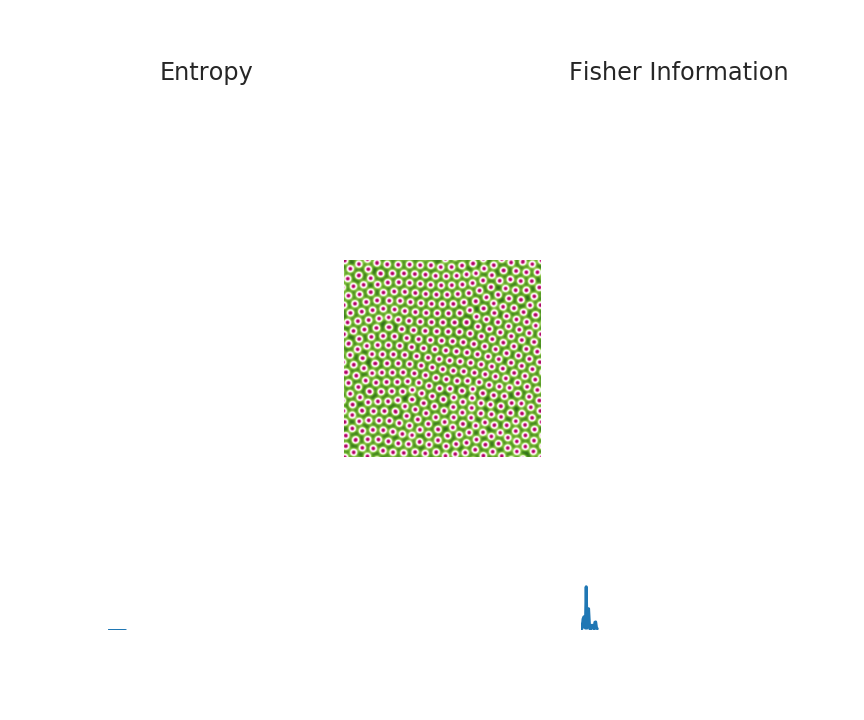

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,10))
ax1.set_axis_off()
ax1.set_title("Entropy")
ax2.set_axis_off()
ax3.set_title("Fisher Information")
ax3.set_axis_off()
im1 = ax2.imshow(gifding[0], origin='lower', interpolation='bicubic', cmap='PiYG', animated=True)
im2, = ax3.plot(f, ds2)
im3, = ax1.plot(f, entropy)

def updatefig(i):
    im1.set_array(gifding[i])
    im2.set_data(f[:i], ds2[:i])
    im2.axes.axis([np.max(f), np.min(f), np.min(ds2), np.max(ds2)])
    im3.set_data(f[:i], entropy[:i])
    im3.axes.axis([np.max(f), np.min(f), np.min(entropy), np.max(entropy)])
    return im1, im2, im3,

ani = animation.FuncAnimation(fig, updatefig, interval=200, save_count=250)
# plt.colorbar()
ani.save("traj1.mp4")
plt.show()

<IPython.core.display.Javascript object>


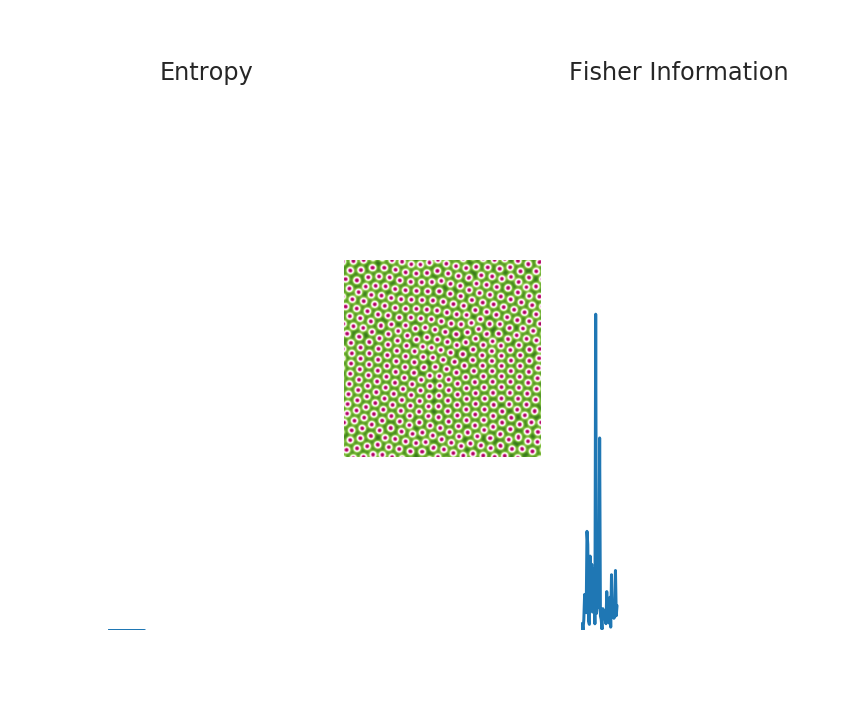

In [36]:
gifding = np.load('gifje2.npy')
ds2 = np.abs(np.loadtxt('ds2v2'))
entropy = np.loadtxt('entropy2')
f = np.linspace(0.0395, 0.04228, 250)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,10))
ax1.set_axis_off()
ax1.set_title("Entropy")
ax2.set_axis_off()
ax3.set_title("Fisher Information")
ax3.set_axis_off()
im1 = ax2.imshow(gifding[0], origin='lower', interpolation='bicubic', cmap='PiYG', animated=True)
im2, = ax3.plot(f, ds2)
im3, = ax1.plot(f, entropy)

def updatefig(i):
    im1.set_array(gifding[i])
    im2.set_data(f[:i], ds2[:i])
    im2.axes.axis([np.min(f), np.max(f), np.min(ds2), np.max(ds2)])
    im3.set_data(f[:i], entropy[:i])
    im3.axes.axis([np.min(f), np.max(f), np.min(entropy), np.max(entropy)])
    return im1, im2, im3,

ani = animation.FuncAnimation(fig, updatefig, interval=200, save_count=250)
# plt.colorbar()
ani.save("traj2.mp4")
plt.show()